In [1]:
%matplotlib inline

# Packages
import os, glob, scipy, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project directory
base_dir = os.path.realpath('..')
print(base_dir)

# Project-specific functions
funDir = os.path.join(base_dir,'Code/Functions')
print(funDir)
sys.path.append(funDir)
import choiceModels, costFunctions, penalizedModelFit, simulateModel

# General-use python functions
dbPath = '/'.join(base_dir.split('/')[0:4])
sys.path.append('%s/Python'%dbPath)
import FigureTools

/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode
/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode/Code/Functions


## Load data

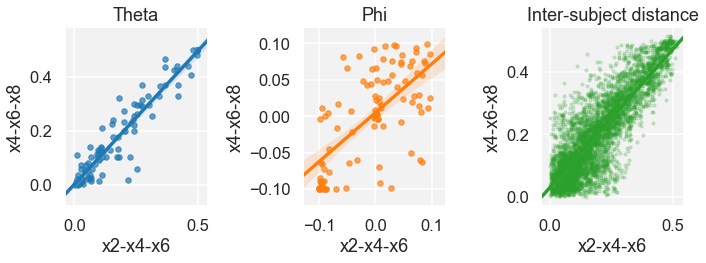

In [4]:
params_4 = pd.read_csv(os.path.join(base_dir,'Data/Study1/ComputationalModel',
                'ParamsClusters_study-1_baseMult-4_model-MP_ppSOE_precision-100.csv'),index_col=0)
params_6 = pd.read_csv(os.path.join(base_dir,'Data/Study1/ComputationalModel',
                'ParamsClusters_study-1_baseMult-6_model-MP_ppSOE_precision-100.csv'),index_col=0)
exclude = np.array(pd.read_csv(os.path.join(base_dir,'Data/Study1/HMTG/exclude.csv'),index_col=None,header=None).T)[0]
params = params_4[['sub','theta','phi','ClustName']].merge(params_6[['sub','theta','phi','ClustName']],on='sub',suffixes=['_4','_6'])
params.columns = ['sub','Theta in x2-x4-x6','Phi in x2-x4-x6','Cluster in x2-x4-x6',
                  'Theta in x4-x6-x8','Phi in x4-x6-x8','Cluster in x4-x6-x8']
params = params.loc[~params['sub'].isin(exclude)]
params.head()

## Compute test-retest of inter-subject distance
dist_x4 = scipy.spatial.distance.pdist(params[['Theta in x2-x4-x6','Phi in x2-x4-x6']])
dist_x6 = scipy.spatial.distance.pdist(params[['Theta in x4-x6-x8','Phi in x4-x6-x8']])

dists = pd.DataFrame([dist_x4,dist_x6]).T
dists.columns = ['x4','x6']
dists.head()

# Plot
FigureTools.mydesign()
# sns.set_palette('Greys')
fig,ax = plt.subplots(1,3,figsize=[10,4])
sns.regplot(data=params,x='Theta in x2-x4-x6',y='Theta in x4-x6-x8',scatter_kws={'alpha':.7,'s':30},ax=ax[0])
sns.regplot(data=params,x='Phi in x2-x4-x6',y='Phi in x4-x6-x8',scatter_kws={'alpha':.7,'s':30},ax=ax[1])
sns.regplot(data=dists,x='x4',y='x6',scatter_kws={'alpha':.2,'s':10},ax=ax[2])
for a in range(3):
    ax[a].set_xlabel('x2-x4-x6')
    ax[a].set_ylabel('x4-x6-x8')
ax[0].set_title('Theta')
ax[1].set_title('Phi')
ax[2].set_title('Inter-subject distance')
plt.tight_layout()
plt.savefig(base_dir + '/Results/Figure4ABC.pdf',bbox_inches='tight')

In [3]:
print(scipy.stats.pearsonr(params['Theta in x2-x4-x6'],params['Theta in x4-x6-x8']))
print(scipy.stats.pearsonr(params['Phi in x2-x4-x6'],params['Phi in x4-x6-x8']))
print(scipy.stats.pearsonr(dists['x4'],dists['x6']))

(0.9456779411426169, 1.339578419149539e-50)
(0.6567833747647971, 6.602203102146858e-14)
(0.8583451965831164, 0.0)
